In [1]:
import sys
sys.path.append("../")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sns.set_context('paper')
import logging
logging.basicConfig(format='%(asctime)s %(levelname)-7s %(message)s',
                    stream=sys.stderr, level=logging.INFO)
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.INFO)

import os

from pathlib import Path
import pandas as pd
import json
from collections import Counter

#In-house Module Imports
from config import Configuration 

In [4]:
user = "aksar"
logging.warning(f'Are you sure that you are: {user}?')

2022-05-20 14:37:44,456 WARNING Are you sure that you are: aksar?


In [18]:
#Update these
#Either Eclipse - MVTS or Volta - TSFRESH

PARENT_DIR = 'active_learning_experiments' #active_learning_experiments_final_hdfs
SYSTEM = 'volta'
FE_NAME = 'tsfresh'
EXP_NAME = f'{FE_NAME}_experiments'
#eclipse: exp_1_active_learning_investigation
#volta: exp_1_active_learning_investigation
DIR_NAME_TO_GENERATE_RESULTS = 'exp_1_active_learning_investigation' 

In [19]:
OUTPUT_DIR = f'/projectnb/peaclab-mon/{user}/{PARENT_DIR}' # or feature_extraction_experiments
CV_INDEX = 0
SCALER = 'None' #For now, do the scaling inside the notebook, then you can move that to the class function

In [20]:
conf = Configuration(ipython=True,
                     overrides={
                         'output_dir': Path(OUTPUT_DIR), #change
                         'system' : SYSTEM,
                         'exp_name':EXP_NAME,                                                  
                         'cv_fold':CV_INDEX, 
                         'model_config': DIR_NAME_TO_GENERATE_RESULTS
                     })

with open(str(conf['experiment_dir']) + '/anom_dict.json') as f:
    ANOM_DICT = json.load(f)
with open(str(conf['experiment_dir']) + '/app_dict.json') as f:
    APP_DICT = json.load(f) 
    
APP_REVERSE_DICT = {}
for app_name, app_encoding in APP_DICT.items():
    APP_REVERSE_DICT[str(app_encoding)] = app_name    

ANOM_REVERSE_DICT = {}
for anom_name, anom_encoding in ANOM_DICT.items():
    ANOM_REVERSE_DICT[str(anom_encoding)] = anom_name

2022-05-20 14:39:54,514 WARNING You set windowing False, but you are trying to define window_size parameter, it is automatically set to 0. Please double check.
2022-05-20 14:39:54,515 INFO    Setting directory names
2022-05-20 14:39:54,517 INFO    Model config folder already exists, be careful, otherwise it will overwrite!
2022-05-20 14:39:54,518 INFO    Saving configuration as CSV


# The configuration used for this run:
# {'cv_fold': 0,
#  'exp_name': 'tsfresh_experiments',
#  'experiment_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments'),
#  'feature_extract': False,
#  'feature_select': False,
#  'hdf_data_path': PosixPath('/projectnb/peaclab-mon/aksar/datasets/tpds_data_hdfs'),
#  'metadata_path': None,
#  'model_config': 'exp_1_active_learning_investigation',
#  'model_config_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_0/exp_1_active_learning_investigation'),
#  'model_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_0/exp_1_active_learning_investigation/model'),
#  'num_split': 5,
#  'operation': 'read',
#  'output_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta'),
#  'plots_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_expe

In [46]:
result_df = pd.DataFrame()
result_list = []

for cv_index in [0,1,2,3,4]:

    conf = Configuration(ipython=True,
                         overrides={
                             'output_dir': Path(OUTPUT_DIR), #change
                             'system' : SYSTEM,
                             'exp_name':EXP_NAME,                                                  
                             'cv_fold':cv_index, 
                             'model_config': DIR_NAME_TO_GENERATE_RESULTS
                         }
                        )
    
    for filename in os.listdir(conf['results_dir']):

        if  "app-anom-selection" in filename:
            
            only_filename = filename.split('.')
            splitted_filename = only_filename[0].split('#')
            train_apps = splitted_filename[0].split(':')[1]
            test_apps = splitted_filename[1].split(':')[1]
            
            feature_count = splitted_filename[3]            
            method = splitted_filename[4]
            query_strategy = splitted_filename[5]
            query_size = splitted_filename[6]
            model_name = splitted_filename[7]
            
            num_unknown_test_apps = len(test_apps.split("-"))
            num_known_train_apps = len(train_apps.split("-"))        

            temp_csv = pd.read_csv(Path(conf['results_dir']) / filename)
            temp_csv['cv_index'] = cv_index
            temp_csv['num_known_train_apps'] = num_known_train_apps
            temp_csv['num_unknown_test_apps'] = num_unknown_test_apps
            temp_csv['train_apps'] = train_apps
            temp_csv['test_apps'] = test_apps
            temp_csv['feature_count'] = feature_count
            temp_csv['method'] = method
            temp_csv['query_strategy'] = query_strategy
            temp_csv['query_size'] = query_size
            temp_csv['model_name'] = model_name
            temp_csv['fold'] = cv_index
            
            result_list.append(temp_csv)
               
    result_df = pd.concat(result_list, axis=0)
    result_df['anoms'] = result_df['anoms'].apply(lambda x: ANOM_REVERSE_DICT[str(x)])

2022-05-20 14:48:21,144 WARNING You set windowing False, but you are trying to define window_size parameter, it is automatically set to 0. Please double check.
2022-05-20 14:48:21,146 INFO    Setting directory names
2022-05-20 14:48:21,158 INFO    Model config folder already exists, be careful, otherwise it will overwrite!
2022-05-20 14:48:21,164 INFO    Saving configuration as CSV
2022-05-20 14:48:21,201 WARNING You set windowing False, but you are trying to define window_size parameter, it is automatically set to 0. Please double check.
2022-05-20 14:48:21,202 INFO    Setting directory names
2022-05-20 14:48:21,224 INFO    Model config folder already exists, be careful, otherwise it will overwrite!
2022-05-20 14:48:21,230 INFO    Saving configuration as CSV
2022-05-20 14:48:21,265 WARNING You set windowing False, but you are trying to define window_size parameter, it is automatically set to 0. Please double check.
2022-05-20 14:48:21,267 INFO    Setting directory names
2022-05-20 14:

# The configuration used for this run:
# {'cv_fold': 0,
#  'exp_name': 'tsfresh_experiments',
#  'experiment_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments'),
#  'feature_extract': False,
#  'feature_select': False,
#  'hdf_data_path': PosixPath('/projectnb/peaclab-mon/aksar/datasets/tpds_data_hdfs'),
#  'metadata_path': None,
#  'model_config': 'exp_1_active_learning_investigation',
#  'model_config_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_0/exp_1_active_learning_investigation'),
#  'model_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_0/exp_1_active_learning_investigation/model'),
#  'num_split': 5,
#  'operation': 'read',
#  'output_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta'),
#  'plots_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_expe

2022-05-20 14:48:21,374 INFO    Saving configuration as CSV
2022-05-20 14:48:21,410 WARNING You set windowing False, but you are trying to define window_size parameter, it is automatically set to 0. Please double check.
2022-05-20 14:48:21,412 INFO    Setting directory names
2022-05-20 14:48:21,422 INFO    Model config folder already exists, be careful, otherwise it will overwrite!
2022-05-20 14:48:21,425 INFO    Saving configuration as CSV


# The configuration used for this run:
# {'cv_fold': 3,
#  'exp_name': 'tsfresh_experiments',
#  'experiment_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments'),
#  'feature_extract': False,
#  'feature_select': False,
#  'hdf_data_path': PosixPath('/projectnb/peaclab-mon/aksar/datasets/tpds_data_hdfs'),
#  'metadata_path': None,
#  'model_config': 'exp_1_active_learning_investigation',
#  'model_config_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_3/exp_1_active_learning_investigation'),
#  'model_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_3/exp_1_active_learning_investigation/model'),
#  'num_split': 5,
#  'operation': 'read',
#  'output_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta'),
#  'plots_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_expe

In [47]:
unique_methods = result_df['method'].unique()
logging.info("Unique Methods: %s", unique_methods)
unique_query_strategies = result_df['query_strategy'].unique()
logging.info("Unique query strategies: %s",unique_query_strategies)
unique_feature_counts = sorted(result_df['feature_count'].unique())
logging.info("Num Features: %s", unique_feature_counts)
unique_query_sizes = sorted(result_df['query_size'].unique())
logging.info("Unique query sizes: %s",unique_query_sizes)
unique_known_train_apps = result_df['num_known_train_apps'].unique()
logging.info("Number of Known Apps in the Training: %s", unique_known_train_apps)
unique_unknown_test_apps = result_df['num_unknown_test_apps'].unique()
logging.info("Number of Unknown Apps in the Test: %s", unique_unknown_test_apps)
unique_folds = len(result_df[result_df['query_strategy'] != 'random']['fold'].unique())
logging.info("Number of Folds for the Active Learning Methods: %s", unique_folds)

2022-05-20 14:48:21,484 INFO    Unique Methods: ['active_learning']
2022-05-20 14:48:21,485 INFO    Unique query strategies: ['uncertainty' 'margin']
2022-05-20 14:48:21,487 INFO    Num Features: ['2000']
2022-05-20 14:48:21,488 INFO    Unique query sizes: ['250', '50']
2022-05-20 14:48:21,490 INFO    Number of Known Apps in the Training: [1]
2022-05-20 14:48:21,491 INFO    Number of Unknown Apps in the Test: [1]
2022-05-20 14:48:21,496 INFO    Number of Folds for the Active Learning Methods: 5


In [48]:
selected_result_df = result_df[result_df['query_size'] == '50'] 

In [49]:
param_dict = {
                'fig_width': 36,
                'fig_height': 12,
                'y_label_font': 36,
                'x_label_font': 36,
                 'x_ticks_font': 32,
                 'y_ticks_font': 40,    
                'legend_size': 30,
                'legend_title_size': 40,
                'title_size': 36,
                'title_pad': 40,             
             }

/project/peaclab-mon/monitoring_venv/lib/python3.6/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/project/peaclab-mon/monitoring_venv/lib/python3.6/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


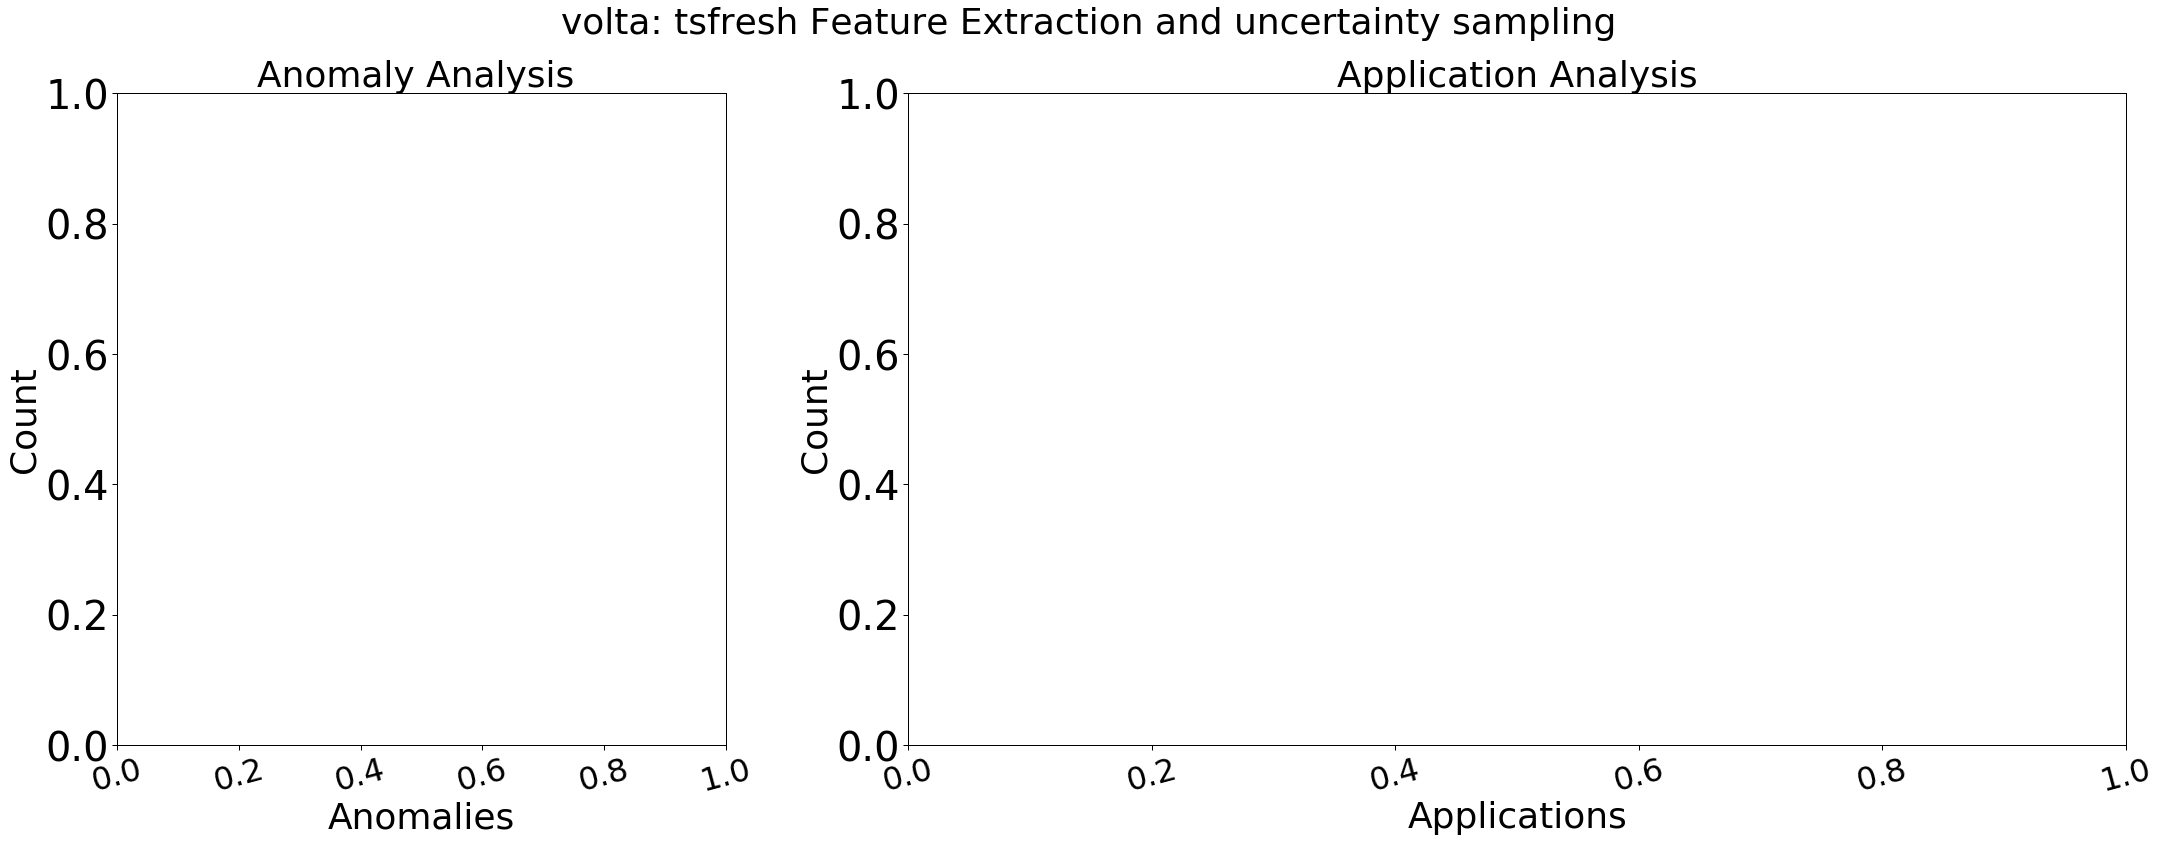

/project/peaclab-mon/monitoring_venv/lib/python3.6/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/project/peaclab-mon/monitoring_venv/lib/python3.6/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


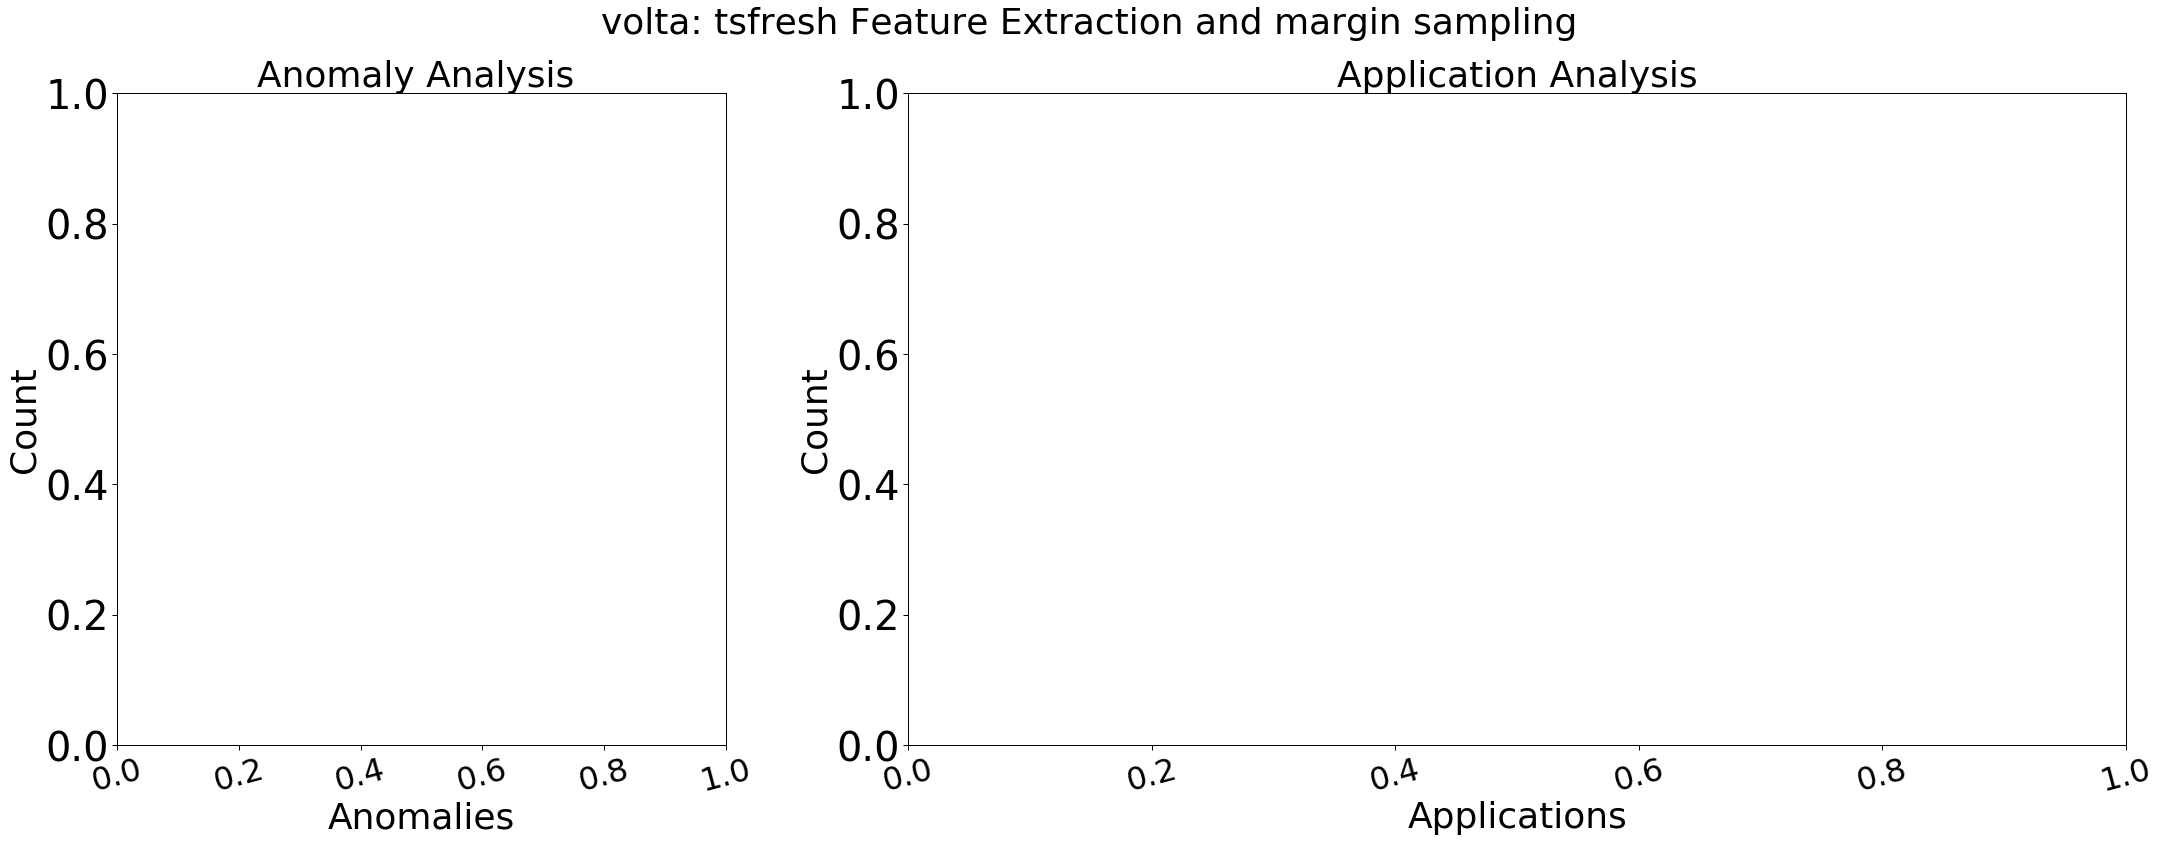

In [50]:
for unique_query_strategy in unique_query_strategies:
    
    anom_dist_df = selected_result_df[selected_result_df['query_strategy'] == unique_query_strategy].groupby(['cv_index','anoms']).size().reset_index(name="counts")
    anom_dist_df = anom_dist_df.sort_values(by=['anoms'])
    app_dist_df = selected_result_df[selected_result_df['query_strategy'] == unique_query_strategy].groupby(['cv_index','apps']).size().reset_index(name="counts")
    app_dist_df = app_dist_df.sort_values(by=['apps'])
    fig, ax = plt.subplots(1,2,figsize=(param_dict['fig_width'], param_dict['fig_height']),gridspec_kw={'width_ratios': [1, 2]})

    fig.suptitle(f"{SYSTEM}: {FE_NAME} Feature Extraction and {unique_query_strategy} sampling",fontsize=param_dict["title_size"])

    sns.catplot(x="anoms", y="counts", kind="box", 
                data=anom_dist_df, 
                sym='', 
                ax=ax[0]
                
               )

    ax[0].set_ylabel("Count",size=param_dict['y_label_font'])           
    ax[0].set_xlabel("Anomalies",size=param_dict['x_label_font'])

    ax[0].set_title(f"Anomaly Analysis ",fontsize=param_dict['title_size'])

    ax[0].tick_params(axis='x', labelsize= param_dict['x_ticks_font'], rotation=15)
    ax[0].tick_params(axis='y', labelsize= param_dict['y_ticks_font'])
    plt.close(2) #The most ridiculous thing ever, thanks catplot

    sns.catplot(x="apps", y="counts", kind="box", data=app_dist_df, sym='', ax=ax[1])

    ax[1].set_ylabel("Count",size=param_dict['y_label_font'])           
    ax[1].set_xlabel("Applications",size=param_dict['x_label_font'])

    ax[1].set_title(f"Application Analysis",fontsize=param_dict['title_size'])

    ax[1].tick_params(axis='x', labelsize= param_dict['x_ticks_font'], rotation=15)
    ax[1].tick_params(axis='y', labelsize= param_dict['y_ticks_font'])

    plt.close(2) #The most ridiculous thing ever, thanks catplot
    plt.show()        

## Paper Plots

In [62]:
param_dict = {
                'fig_width': 32,
                'fig_height': 12,
                'y_label_font': 42,
                'x_label_font': 42,
                 'x_ticks_font': 32,
                 'y_ticks_font': 36,    
                'legend_size': 30,
                'legend_title_size': 40,
                'title_size': 40,
                'title_pad': 40,             
             }

In [63]:
if SYSTEM == 'volta':
    unique_query_strategy = 'uncertainty'
elif SYSTEM == 'eclipse':
    unique_query_strategy = 'margin'

In [64]:
selected_result_df = result_df[result_df['query_size'] == '50'] 

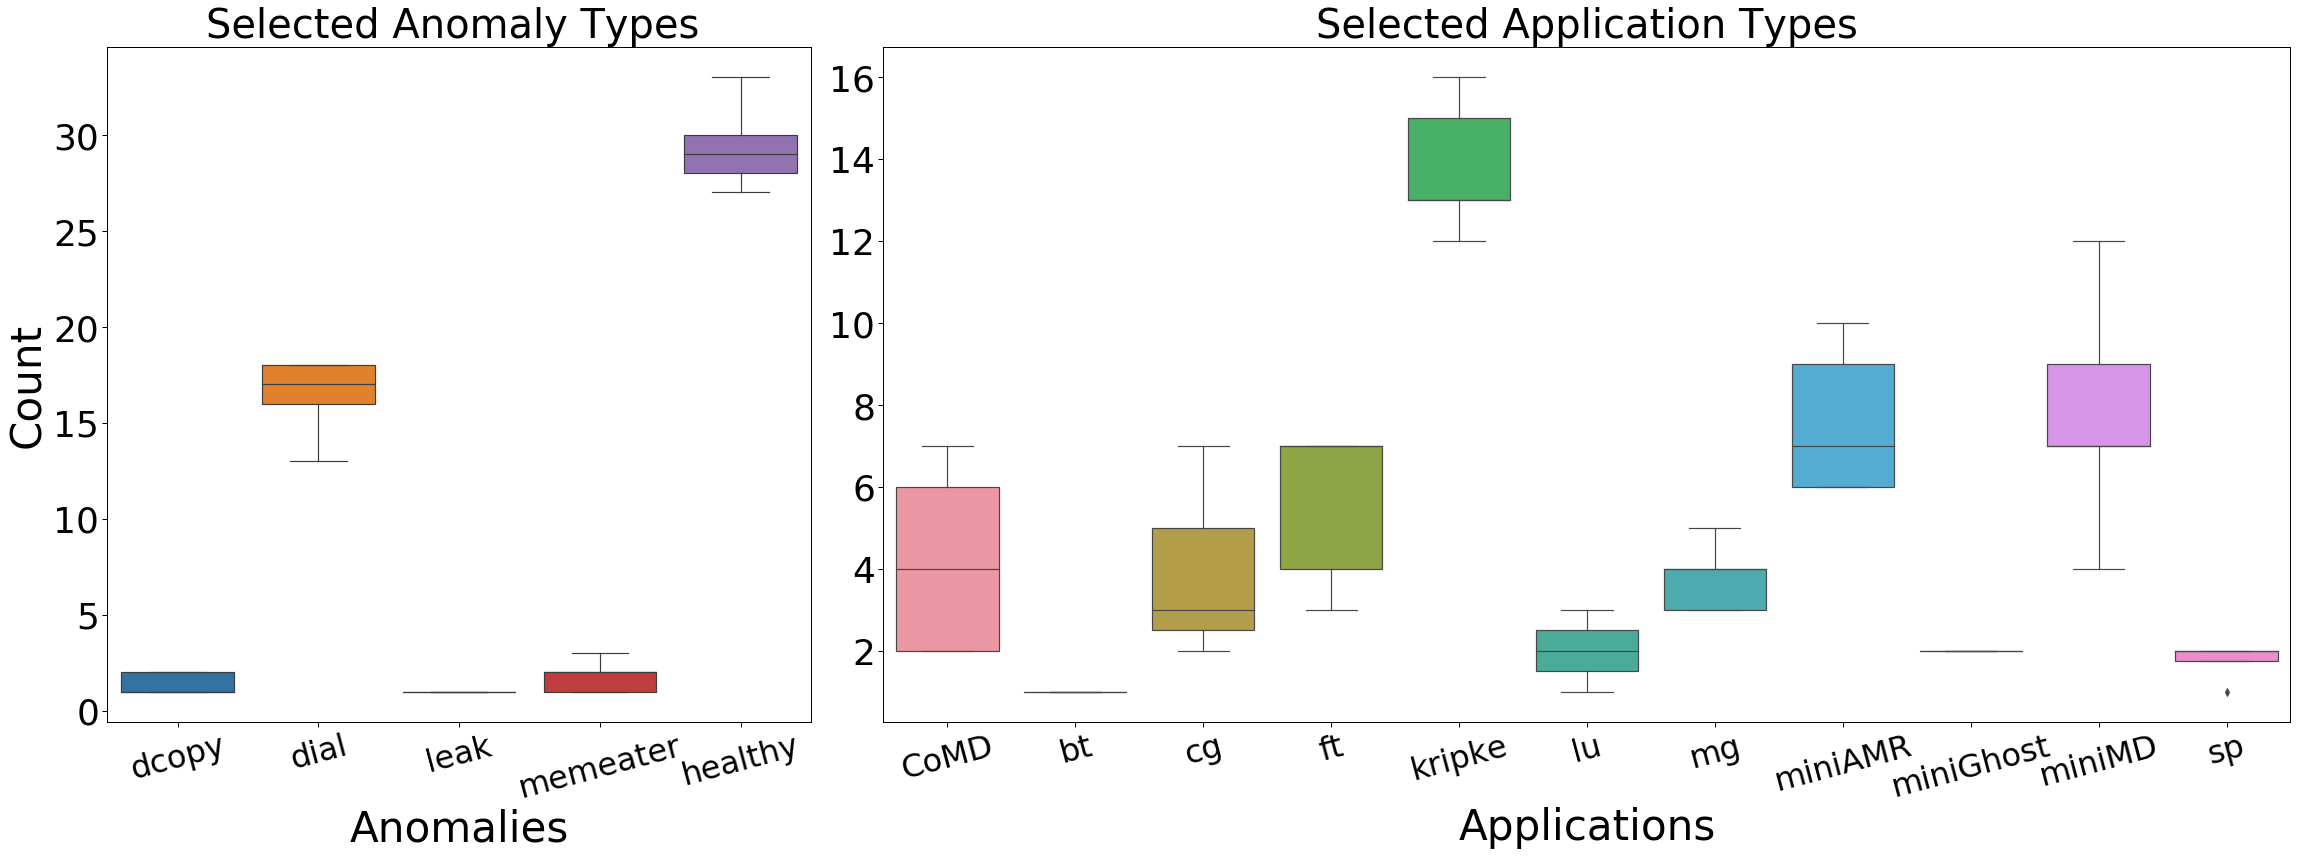

In [65]:
anom_dist_df = selected_result_df[selected_result_df['query_strategy'] == unique_query_strategy].groupby(['cv_index','anoms']).size().reset_index(name="counts")
anom_dist_df = anom_dist_df.sort_values(by=['anoms'])
app_dist_df = selected_result_df[selected_result_df['query_strategy'] == unique_query_strategy].groupby(['cv_index','apps']).size().reset_index(name="counts")
app_dist_df = app_dist_df.sort_values(by=['apps'])
fig, ax = plt.subplots(1,2,figsize=(param_dict['fig_width'], param_dict['fig_height']),gridspec_kw={'width_ratios': [1, 2]})

fig.suptitle(f"{SYSTEM}: {FE_NAME} Feature Extraction and {unique_query_strategy} sampling",fontsize=param_dict["title_size"])

sns.boxplot(x="anoms", 
            y="counts", 
            data=anom_dist_df,
            ax=ax[0]
           )



ax[0].set_ylabel("Count",size=param_dict['y_label_font'])           
ax[0].set_xlabel("Anomalies",size=param_dict['x_label_font'])

ax[0].set_title(f"Selected Anomaly Types ",fontsize=param_dict['title_size'])

ax[0].set_xticklabels(['dcopy','dial','leak','memeater','healthy'])
ax[0].tick_params(axis='x', labelsize= param_dict['x_ticks_font'], rotation=15)
ax[0].tick_params(axis='y', labelsize= param_dict['y_ticks_font'])
plt.close(2) #The most ridiculous thing ever, thanks catplot


sns.boxplot(x="apps", 
            y="counts", 
            data=app_dist_df,
            ax=ax[1]
           )

ax[1].set_ylabel("",size=param_dict['y_label_font'])           
ax[1].set_xlabel("Applications",size=param_dict['x_label_font'])

ax[1].set_title(f"Selected Application Types",fontsize=param_dict['title_size'])

ax[1].tick_params(axis='x', labelsize= param_dict['x_ticks_font'], rotation=15)
ax[1].tick_params(axis='y', labelsize= param_dict['y_ticks_font'])

plt.close(2) #The most ridiculous thing ever, thanks catplot
fig.suptitle("")
plt.tight_layout()
plt.savefig(f"/usr3/graduate/baksar/projectx/AI4HPCAnalytics/src/active_learning_experiments/plots/{SYSTEM}_{FE_NAME}_al_drill_down.pdf", bbox_inches='tight')
#plt.show()